In [1]:
# carga de 

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

"""
_ventas = ventas agrupadas por canasta 
_ventas1 = ventas individuales sin agrupar y contiene todos los productos comprados
_productos = lista de productos y sus códigos
_movimientos = contiene los movimientos realizados con fecha y hora x cada producto.
"""

#lectura de archivos de ventas
datos_ventas = pd.read_excel('./datasets/030122_ventas.xlsx')
datos_canasta = pd.read_excel('./datasets/030122_ventas1.xlsx')
datos_productos = pd.read_excel('./datasets/030122_productos.xlsx')
datos_movimientos = pd.read_excel('./datasets/030122_movimientos.xlsx')

In [2]:
import matplotlib.pyplot as plt
datos_canasta
#datos_movimientos.head()

,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [3]:
#cuales son los tipos de datos
datos_canasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244373 entries, 0 to 244372
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   EmpCod     244373 non-null  int64  
 1   VenNro     244373 non-null  int64  
 2   PrdCod     244373 non-null  int64  
 3   VenIteCnt  244373 non-null  float64
 4   VenItePrc  244373 non-null  int64  
 5   VenIteIde  244373 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 11.2+ MB


In [4]:
# existen datos nulos ?
datos_canasta.isnull().sum()

EmpCod       0
VenNro       0
PrdCod       0
VenIteCnt    0
VenItePrc    0
VenIteIde    0
dtype: int64

### Cuántas tipos de canastas diferentes existen

In [6]:
# periodo de análisis

datos = datos_movimientos['MovFch']
print(f'fecha inicio: ' + str(min(datos)))
print(f'fecha final: ' + str(max(datos)))

# números de canastas únicas

print('\nCanastas únicas: ' + str(len(datos_canasta['VenNro'].unique())))

fecha inicio: 2020-08-09 00:00:00
fecha final: 2021-12-03 00:00:00

Canastas únicas: 97646


### cuántos productos son incluidos en las canastas. 

Se analiza la cantidad de productos, mostrando algunas medidas como, max, min, media, median. Y también de forma gráfica

In [7]:
# agrupar por canasta y contar los productos que existen

datos_canasta.groupby('VenNro').VenNro.count().reset_index(name='CantidadProductos')


,VenNro,CantidadProductos
0,11,4
1,12,14
2,13,1
3,14,1
4,15,1
...,...,...
97641,97653,2
97642,97654,3
97643,97655,1
97644,97656,2


In [8]:
#agrupar datos por N° venta y código de producto. Se suma la cantidad y se cuenta cuántas veces el 
resultado = datos_canasta.groupby(['VenNro','PrdCod']).VenIteCnt.agg(['sum','count'])
print(resultado.head(5))

# verificar si existen cod. productos duplicados en las canastas.
"""
Count, indica si existen duplicidad de cod. de productos
Sum, suma la cantidad vendida por cada cod. de productos
"""
print('\nN° canastas con productos duplicados: ', len(resultado[resultado['count'] >1]))
print('N° canastas sin productos: ', len(resultado[resultado['count'] == 0]))


               sum  count
VenNro PrdCod            
11     952     1.0      1
       975     3.0      1
       989     6.0      1
       1178    1.0      1
12     111     2.0      1

N° canastas con productos duplicados:  0
N° canastas sin productos:  0


In [9]:
"""
Agrupación por canastas únicas.
CantidadProducts, se agrupan por cod. productos
"""
# se agrega la cantidad de productos agrupado
productos_canasta = datos_canasta.groupby('VenNro').agg(
    CantidadProductos=('PrdCod', 'count')
).reset_index()

print(productos_canasta.head(5))

productos_canasta.describe()

   VenNro  CantidadProductos
0      11                  4
1      12                 14
2      13                  1
3      14                  1
4      15                  1


,VenNro,CantidadProductos
count,97646.000000,97646.000000
mean,48834.493743,2.502642
std,28188.127300,2.071666
min,11.000000,1.000000
25%,24423.250000,1.000000
50%,48834.500000,2.000000
75%,73245.750000,3.000000
max,97657.000000,54.000000


Se puede ver desde el resumen, que existen outliers y que se requiere verificar en las siguientes secciones.

C:\Users\darw_\AppData\Local\Temp\ipykernel_16968\1380610625.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])


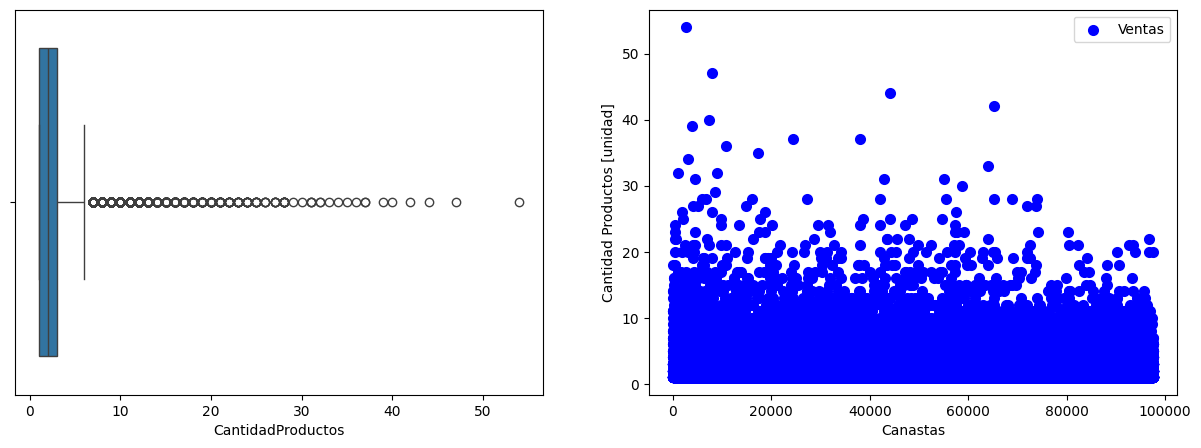

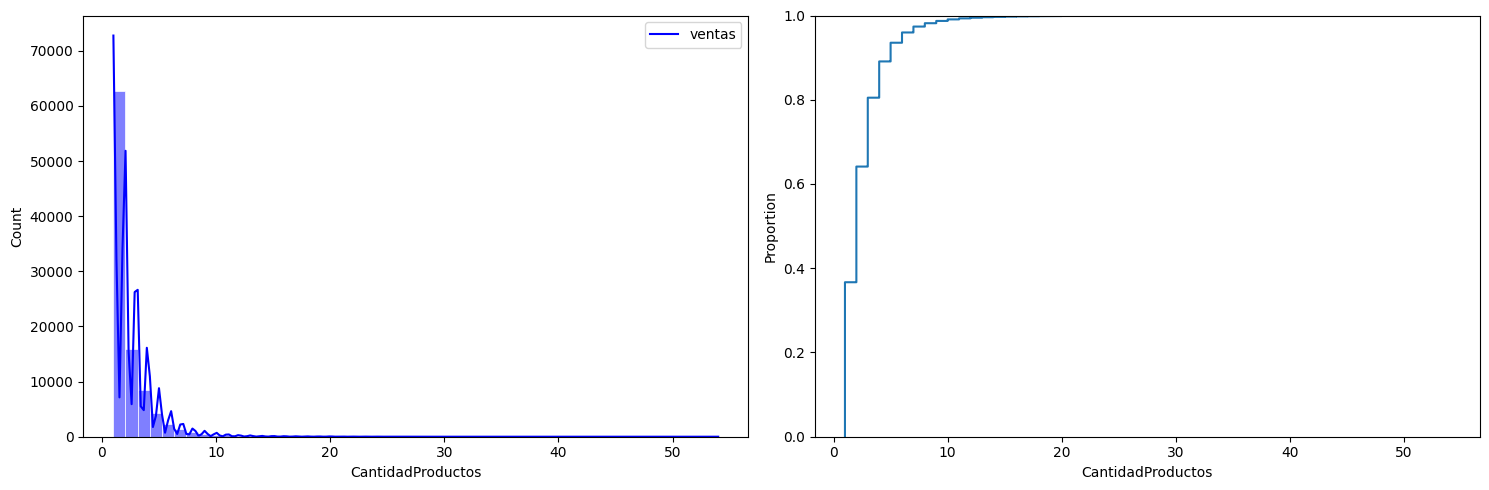

In [10]:
"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) gráfico de cajas, (der) scatter
"""

figura_tamaño = (15,5)

fig, axes = plt.subplots(1,2, figsize=figura_tamaño)
# valores a mostrar
x = productos_canasta.index
y = productos_canasta['CantidadProductos']
base_datos = productos_canasta

# muestra boxplot para tag 1 y tag 2
sns.boxplot(data=base_datos, x="CantidadProductos", ax=axes[0])

# grafica los datos 
axes[1].scatter(x, y, linewidth=2.0, color='blue')

plt.xlabel('Canastas') 
plt.ylabel('Cantidad Productos [unidad]') 
plt.legend(["Ventas"], loc="upper right")
plt.show
#---------------------
"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) histograma, (der) distribucion acumulativa
"""

fig , axes= plt.subplots(1,2, figsize= figura_tamaño)
axes = axes.ravel()

sns.histplot(y, bins=50, linewidth=0.5, edgecolor="white", color='blue', kde=True, ax=axes[0])
#sns.violinplot(data=base_datos, x="CantidadProductos", ax=axes[0] )
axes[0].legend(["ventas"], loc="upper right")


# distribución acumulativa
sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])

fig.tight_layout()
plt.show()

Se puede verificar que +95% de la distribución está 1 y 15 productos. Y existen casos con mayor cantidad de productos pero son casos menos probable que son identificados como outliers.
Por lo tanto, se toma la decisión de considerar en un análisis hasta 15 productos.

In [11]:
"""
Filtrado de datos por cantidad de productos en canasta <=15
"""
cantidad_productos = 15
canastas_menor10productos = productos_canasta[productos_canasta['CantidadProductos'] <= cantidad_productos]
canastas_mayor10productos = productos_canasta[productos_canasta['CantidadProductos'] >= cantidad_productos]

print(f'Cantidad canastas menor a {cantidad_productos} productos:', len(canastas_menor10productos))
print(f'Cantidad canastas mayor a {cantidad_productos} productos:', len(canastas_mayor10productos))

#-------------------------- texto a mostrar 
print(f'\ndatos filtrados para menor igual a {cantidad_productos} productos')

datos_filtrados =datos_canasta[datos_canasta['VenNro'].isin(canastas_menor10productos['VenNro'])]
datos_filtrados

Cantidad canastas menor a 15 productos: 97385
Cantidad canastas mayor a 15 productos: 326

datos filtrados para menor igual a 15 productos


,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


### Productos más vendidos

In [12]:
import datetime as dt
from datetime import timedelta
"""
Función que permite calcular la cantidad de semanas en los datos analizados
devuelve el n° de semanas
"""


def semanas_ventas(data_ventas):
    datos = data_ventas['MovFch']
    fecha_inicio =  min(datos)
    fecha_final = max(datos)
    fecha_inicio, fecha_final
    total_dias = (fecha_final- fecha_inicio)/timedelta(days=1)
    return round(total_dias/7)

In [13]:
#cantidad de veces que los cod. productos son comprados
#-------------------------- texto a mostrar 
print(f'\nSe agrupan los datos por cod. Producto y se cuentan las veces que han comprado el producto')

productos_ordenados = datos_filtrados.groupby('PrdCod').PrdCod.count().reset_index(name='vecesComprado').sort_values(by='vecesComprado', ascending=False)
print(productos_ordenados)


"""
Filtrado de datos por cantidad de ventas al año
se asigna que la mínima frec de ventas a analizar es
un producto debe venderse al menos 2 veces a la semana o 7 días, lunes a domingo.

"""
ventas_porSemanas = 2
ventas_min_año = ventas_porSemanas * semanas_ventas(datos_movimientos)

#filtrado por mínimo de ventas

productos_conMasVentas = productos_ordenados[productos_ordenados['vecesComprado'] >= ventas_min_año]

#filtramos nuevamente la base "datos_filtrados"
#-------------------------- texto a mostrar 
print(f'\ndatos filtrados original, tamaño {len(datos_filtrados)}')

datos_filtrados =datos_filtrados[datos_filtrados['PrdCod'].isin(productos_conMasVentas['PrdCod'])]
#-------------------------- texto a mostrar 
print(f'datos filtrados, después, tamaño {len(datos_filtrados)}')
datos_filtrados



Se agrupan los datos por cod. Producto y se cuentan las veces que han comprado el producto
      PrdCod  vecesComprado
267     1188           8131
688     1627           7665
602     1537           4111
238     1159           3981
347     1269           3631
...      ...            ...
1466    2425              1
1196    2144              1
1200    2148              1
806     1746              1
697     1636              1

[1512 rows x 2 columns]

datos filtrados original, tamaño 238947
datos filtrados, después, tamaño 200967


,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
5,1,12,965,1.0,1300,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [150]:
"""


"""


# agrupar por cuántas veces se compró un producto y su acumulado

productos_agrupados = datos_filtrados.groupby('PrdCod').agg(vecesComprado=('PrdCod', 'count')).reset_index().sort_values(by = 'vecesComprado' ,ascending=False)
productos_agrupados['sumaAcumulada'] = productos_agrupados['vecesComprado'].cumsum()
productos_agrupados['porcentaje'] = (productos_agrupados['vecesComprado'].cumsum() / productos_agrupados['vecesComprado'].sum()) * 100
print(productos_agrupados)

# top 10 productos con mayor cantidad de veces comprados
producto_top20 = productos_agrupados.head(20).sort_values(by='vecesComprado', ascending=False).reset_index(drop=True)
producto_top20


     PrdCod  vecesComprado  sumaAcumulada  porcentaje
103    1188           8131           8131    4.045938
277    1627           7665          15796    7.859997
248    1537           4111          19907    9.905606
86     1159           3981          23888   11.886529
152    1269           3631          27519   13.693293
..      ...            ...            ...         ...
270    1608            140         200413   99.724333
264    1586            139         200552   99.793498
46     1022            139         200691   99.862664
188    1365            138         200829   99.931332
358    2264            138         200967  100.000000

[359 rows x 4 columns]


,PrdCod,vecesComprado,sumaAcumulada,porcentaje
0,1188,8131,8131,4.045938
1,1627,7665,15796,7.859997
2,1537,4111,19907,9.905606
3,1159,3981,23888,11.886529
4,1269,3631,27519,13.693293
5,1287,3194,30713,15.282609
6,1704,3167,33880,16.858489
7,1559,2982,36862,18.342315
8,1163,2533,39395,19.602721
9,955,2272,41667,20.733255


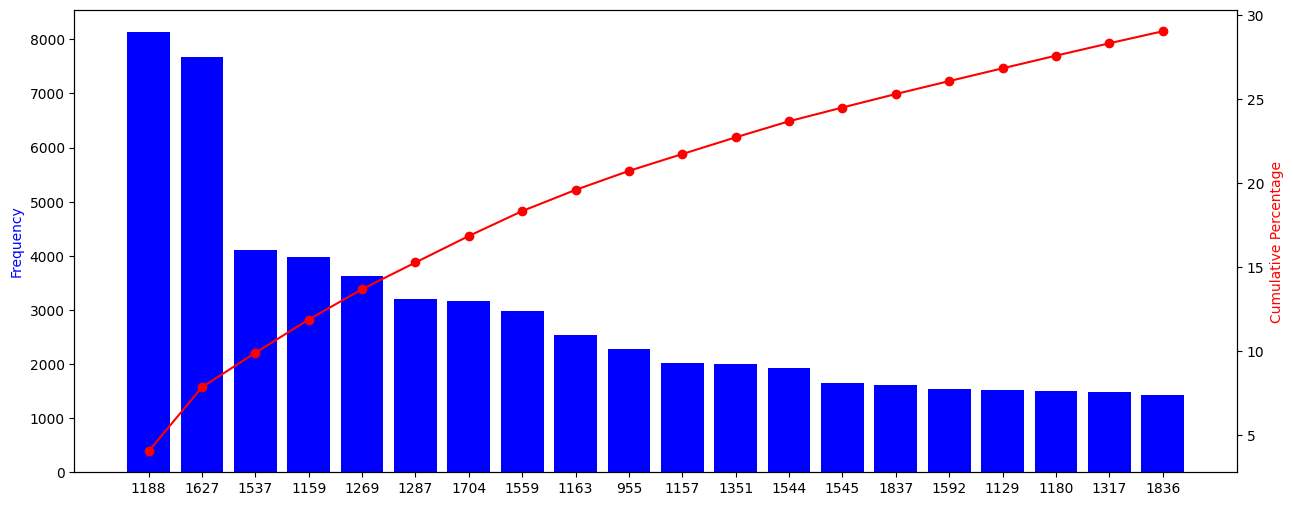

In [165]:
"""
Visualizacion de los productos vendidos ordenados
"""
dframe = producto_top20
figura_tamaño = (15,6)
x = 'PrdCod'
y1= 'vecesComprado'
y2= 'sumaAcumulada'
y3 = 'porcentaje'

#convertir desde int a str
dframe[x] = dframe[x].astype('str')

# figura
fig, ax1 = plt.subplots(figsize= figura_tamaño)

# Bar plot
ax1.bar(dframe[x], dframe[y1], color='b')
ax1.set_ylabel('Frequency', color='b')

# Line plot 
ax2 = ax1.twinx()
ax2.plot(dframe[x], dframe[y3], color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')

# mostrar
plt.show()

<Axes: xlabel='vecesComprado'>

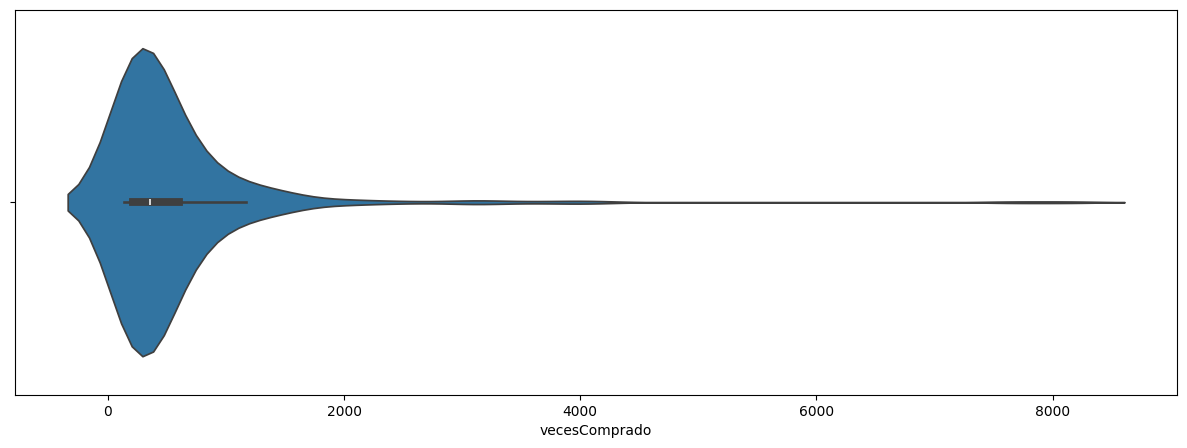

In [121]:
"""
Visualizacion de los productos vendidos ordenador
"""
figura_tamaño = (15,5)
y= productos_agrupados['vecesComprado']
fig , ax = plt.subplots(1,1, figsize= figura_tamaño)


#sns.histplot(y, bins=200, linewidth=0.5, edgecolor="white", color='blue', kde=True, ax=ax)
sns.violinplot(data=productos_agrupados, x="vecesComprado", ax=ax)

Cuándo compran los usuarios, análisis temporal

Cuál es el tamaño de la canasta

Qué productos son comprados en: Día, semana, mes

Cuándo las personas compran, análisis por horario

Qué productos no sean comprado

Tamaño de la canasta por día, semana y mes